<a href="https://colab.research.google.com/github/nagayoshi3/deep_learning_practice/blob/master/1_2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークの基礎2

## データの取得

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


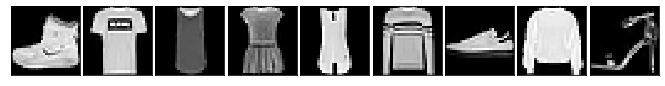

In [0]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# データセットのサイズ
print(x_train.shape) # 訓練データ
print(x_test.shape) # テストデータ


# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')


# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## モデルの構築

In [0]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

# モデルの器を作成
model = Sequential()

# layerクラスを積み重ねる。
model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
# he_normal は、正規分布による重みの初期化を行います。

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))

model.add(Dropout(0.3))
# ドロップアウトは、このように簡単に実行することができます。入力ユニットをドロップする割合を表しています。

model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________

## モデルの学習

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=2, verbose=1)
# patience: ここで指定したエポック数の間（監視する値に）改善がないと，訓練が停止します．

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.8333 - acc: 0.7063 - val_loss: 0.4987 - val_acc: 0.8228
Epoch 2/10
60000/60000 - 1s - loss: 0.4649 - acc: 0.8367 - val_loss: 0.4223 - val_acc: 0.8519
Epoch 3/10
60000/60000 - 1s - loss: 0.3984 - acc: 0.8575 - val_loss: 0.3960 - val_acc: 0.8563
Epoch 4/10
60000/60000 - 1s - loss: 0.3623 - acc: 0.8698 - val_loss: 0.3712 - val_acc: 0.8671
Epoch 5/10
60000/60000 - 1s - loss: 0.3404 - acc: 0.8772 - val_loss: 0.3600 - val_acc: 0.8714
Epoch 6/10
60000/60000 - 1s - loss: 0.3183 - acc: 0.8838 - val_loss: 0.3579 - val_acc: 0.8715
Epoch 7/10
60000/60000 - 1s - loss: 0.3078 - acc: 0.8868 - val_loss: 0.3465 - val_acc: 0.8770
Epoch 8/10
60000/60000 - 1s - loss: 0.2852 - acc: 0.8950 - val_loss: 0.3409 - val_acc: 0.8776
Epoch 9/10
60000/60000 - 1s - loss: 0.2761 - acc: 0.8975 - val_loss: 0.3258 - val_acc: 0.8839
Epoch 10/10
60000/60000 - 1s - loss: 0.2638 - acc: 0.9028 - val_loss: 0.3433 - val_acc: 0.8786


## 評価

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3433445581316948
Test accuracy: 0.8786
